<a href="https://colab.research.google.com/github/asidops12/TugasRegresi/blob/main/Data_Mining_TM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BAGIAN 1: Regresi Linear Sederhana
Studi Kasus: Memprediksi Gaji berdasarkan Lama Pengalaman Kerja.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print("Libraries berhasil di-import!")

Libraries berhasil di-import!


In [2]:
# Membuat data dummy
data_sederhana = {
    'PengalamanKerja': [1, 2, 3, 4, 5, 6, 8, 10],
    'Gaji': [30, 45, 50, 65, 70, 80, 95, 110] # Gaji dalam juta
}
df_sederhana = pd.DataFrame(data_sederhana)
print(df_sederhana)

   PengalamanKerja  Gaji
0                1    30
1                2    45
2                3    50
3                4    65
4                5    70
5                6    80
6                8    95
7               10   110


In [3]:
# Mendefinisikan variabel X dan y
# X harus dalam format 2D, jadi kita gunakan [['...']]
X = df_sederhana[['PengalamanKerja']]
y = df_sederhana['Gaji']

# Membagi data menjadi data training (latihan) dan data testing (ujian)
# 80% untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data berhasil dibagi menjadi data training dan testing.")

Data berhasil dibagi menjadi data training dan testing.


In [4]:
# Membuat model Regresi Linear
model_sederhana = LinearRegression()

# Melatih model dengan data training
model_sederhana.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


In [5]:
# Mencetak intercept (c) dan koefisien (m) dari garis regresi y = mx + c
print(f"Intercept (c): {model_sederhana.intercept_:.2f}")
print(f"Koefisien (m): {model_sederhana.coef_[0]:.2f}")

# Persamaan regresi
print(f"\nPersamaan Gaji = {model_sederhana.coef_[0]:.2f} * (Pengalaman Kerja) + {model_sederhana.intercept_:.2f}")

# Menguji model dengan data testing
y_pred = model_sederhana.predict(X_test)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared: {r2:.2f}")

Intercept (c): 24.77
Koefisien (m): 8.75

Persamaan Gaji = 8.75 * (Pengalaman Kerja) + 24.77

R-squared: 0.98


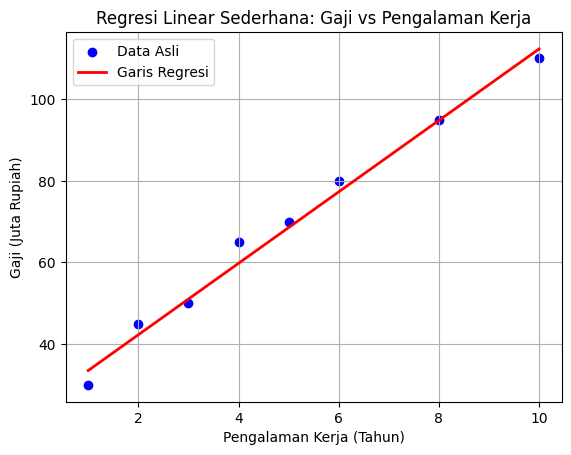

In [6]:
# Plot data asli
plt.scatter(X, y, color='blue', label='Data Asli')

# Plot garis regresi dari model
plt.plot(X, model_sederhana.predict(X), color='red', linewidth=2, label='Garis Regresi')

plt.title('Regresi Linear Sederhana: Gaji vs Pengalaman Kerja')
plt.xlabel('Pengalaman Kerja (Tahun)')
plt.ylabel('Gaji (Juta Rupiah)')
plt.legend()
plt.grid(True)
plt.show()

# BAGIAN 2: Regresi Linear Berganda
Studi Kasus: Memprediksi Harga Rumah.

In [7]:
# Membuat data dummy untuk regresi berganda
data_berganda = {
    'LuasRumah': [100, 150, 120, 200, 80, 160, 130, 180],
    'JumlahKamar': [2, 3, 3, 4, 2, 3, 3, 4],
    'UsiaBangunan': [10, 5, 8, 2, 15, 4, 7, 3],
    'HargaRumah': [500, 800, 650, 1100, 400, 850, 700, 1000] # Harga dalam juta Rupiah
}

df_berganda = pd.DataFrame(data_berganda)

print("Dataset Regresi Linear Berganda:")
print(df_berganda)

Dataset Regresi Linear Berganda:
   LuasRumah  JumlahKamar  UsiaBangunan  HargaRumah
0        100            2            10         500
1        150            3             5         800
2        120            3             8         650
3        200            4             2        1100
4         80            2            15         400
5        160            3             4         850
6        130            3             7         700
7        180            4             3        1000


In [8]:
# Mendefinisikan variabel X (lebih dari satu kolom) dan y
X_multi = df_berganda[['LuasRumah', 'JumlahKamar', 'UsiaBangunan']]
y_multi = df_berganda['HargaRumah']

# Membagi data menjadi data training dan testing
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print("Data berhasil dibagi menjadi data training dan testing.")

Data berhasil dibagi menjadi data training dan testing.


In [9]:
# Membuat model Regresi Linear
model_berganda = LinearRegression()

# Melatih model dengan data training
model_berganda.fit(X_train_m, y_train_m)

print("Model berganda berhasil dilatih!")

Model berganda berhasil dilatih!


In [10]:
# Mencetak intercept
print(f"Intercept: {model_berganda.intercept_:.2f}")

# Mencetak koefisien untuk setiap variabel independen
print("\nKoefisien:")
for i, col in enumerate(X_multi.columns):
    print(f"- {col}: {model_berganda.coef_[i]:.2f}")

# Menguji model dengan data testing
y_pred_m = model_berganda.predict(X_test_m)

# Menghitung R-squared
r2_m = r2_score(y_test_m, y_pred_m)
print(f"\nR-squared: {r2_m:.2f}")

Intercept: -100.00

Koefisien:
- LuasRumah: 5.00
- JumlahKamar: 50.00
- UsiaBangunan: -0.00

R-squared: 1.00


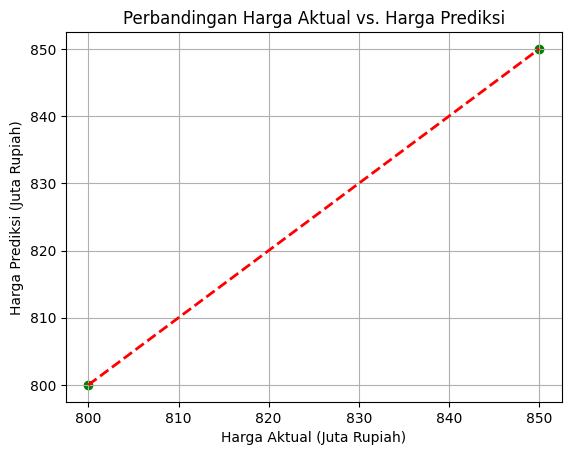

In [11]:
# Membuat plot perbandingan
plt.scatter(y_test_m, y_pred_m, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--', lw=2) # Garis diagonal y=x
plt.title('Perbandingan Harga Aktual vs. Harga Prediksi')
plt.xlabel('Harga Aktual (Juta Rupiah)')
plt.ylabel('Harga Prediksi (Juta Rupiah)')
plt.grid(True)
plt.show()